In [158]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.misc import imread


In [159]:
%matplotlib inline
sns.set_context("poster")

In [160]:
mtx = np.array([[560.33148363, 0.0, 651.26264911],
 [0.0, 561.3767079, 499.06540191],
 [0.0, 0.0, 1.0]])

dist = np.array([[-0.232949182, 0.0617242707, -1.80423444e-05, -0.0075156544954]])

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


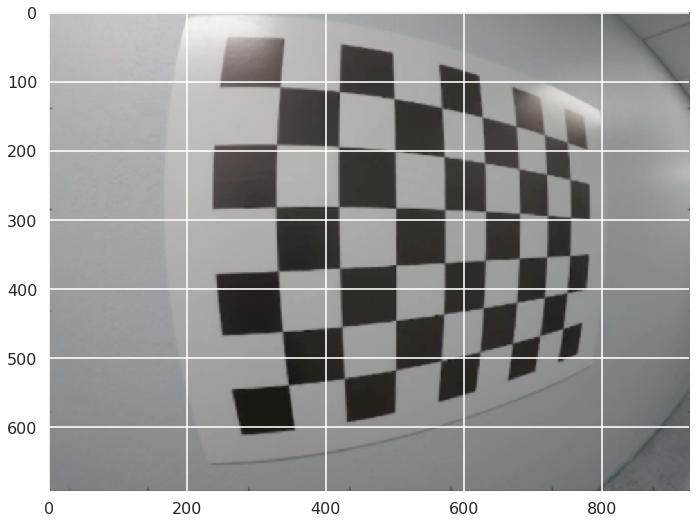

In [161]:
img = imread("raw.png")
plt.imshow(img)

In [162]:
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [163]:
img.shape

(692, 926, 4)

In [164]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undistort = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undistort, cv2.COLOR_RGB2GRAY)

    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(undistort, (nx, ny), None)
    
    if not ret:
        return None
    
    #find corner points and warp
    cv2.drawChessboardCorners(undistort, (nx, ny), corners, ret)
    
    source_points = np.array([corners[x][0] for x in [0,nx-1,-nx,-1]], dtype=np.float32)
    offset = 50
    dist_points = np.array([
        [offset, offset], 
        [img.shape[1] - offset, offset],
        [offset, img.shape[0] - offset],
        [img.shape[1] - offset, img.shape[0] - offset]

    ], dtype=np.float32)

    M = cv2.getPerspectiveTransform(source_points, dist_points)
    img_size = (gray.shape[1], gray.shape[0])
    warped = cv2.warpPerspective(undistort, M, img_size, flags=cv2.INTER_LINEAR )
    return warped, M

In [165]:
tmp, M = corners_unwarp(img, nx, ny, mtx, dist)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


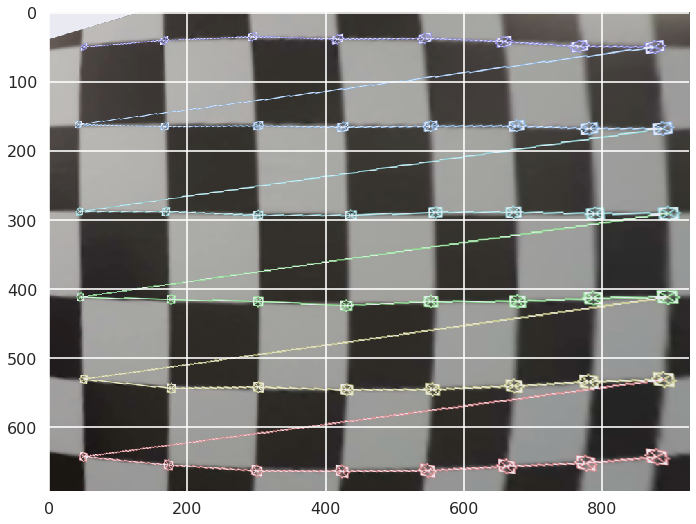

In [166]:
plt.imshow(tmp)